# Face Recognition on Windows 10 Home

KHU, SWCON, Bomin-Seo

https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import face_recognition
from skimage.feature import hog
from skimage import data, exposure, io
import dlib
import numpy as np
import cv2
import openface
import glob
import sys

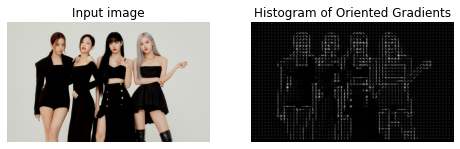

In [2]:
image = io.imread("https://cdn.kbmaeil.com/news/photo/202104/873656_876379_720.jpg")
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [3]:
face_detector = dlib.get_frontal_face_detector()
win = dlib.image_window()
detected_faces = face_detector(image, 1)
print("I found {} faces in the file {}".format(len(detected_faces), ""))
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)

dlib.hit_enter_to_continue()

I found 4 faces in the file 


A face is located at pixel location Top: 87, Left: 667, Bottom: 149, Right: 729
A face is located at pixel location Top: 94, Left: 239, Bottom: 156, Right: 301
A face is located at pixel location Top: 87, Left: 363, Bottom: 149, Right: 425
A face is located at pixel location Top: 87, Left: 508, Bottom: 149, Right: 570


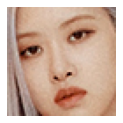

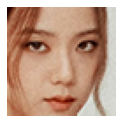

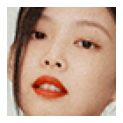

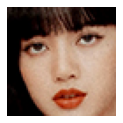

In [4]:
face_locations = face_recognition.face_locations(image)
face_images = []
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    #pil_image.show()
    face_images.append(pil_image)
for i in range(len(face_images)):
    face_image1 = face_images[i]
    fig, face_image1 = plt.subplots(figsize=(2, 2), sharex=True, sharey=True)
    face_image1.axis('off')
    face_image1.imshow(face_images[i], cmap=plt.cm.gray)
    i += 1

In [5]:
predictor_model = "shape_predictor_68_face_landmarks.dat"
face_pose_predictor = dlib.shape_predictor(predictor_model)
win = dlib.image_window()
detected_faces = face_detector(image, 1)
win.set_image(image)
for i, face_rect in enumerate(detected_faces):
    win.add_overlay(face_rect)
    pose_landmarks = face_pose_predictor(image, face_rect)
    win.add_overlay(pose_landmarks)      
dlib.hit_enter_to_continue()

In [14]:
face_image.shape

(62, 62, 3)

In [8]:
detected_faces[0]

rectangle(667,87,729,149)

In [6]:
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)

# Run the HOG face detector on the image data
detected_faces = face_detector(image, 1)
# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):
    pose_landmarks = face_pose_predictor(image, face_rect)
    alignedFace = face_aligner.align(534, image, face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    cv2.imwrite("aligned_face_{}.jpg".format(i), alignedFace)

In [7]:
jenny = [cv2.imread(file) for file in glob.glob("C:/Users/sbm78/ml/training-images/jenny/*.jpg")]
jisoo = [cv2.imread(file) for file in glob.glob("C:/Users/sbm78/ml/training-images/jisoo/*.jpg")]
lisa = [cv2.imread(file) for file in glob.glob("C:/Users/sbm78/ml/training-images/lisa/*.jpg")]
rose = [cv2.imread(file) for file in glob.glob("C:/Users/sbm78/ml/training-images/rose/*.jpg")]

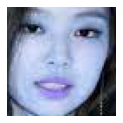

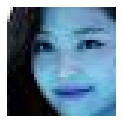

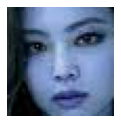

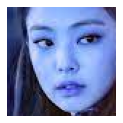

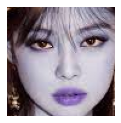

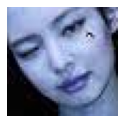

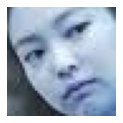

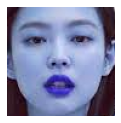

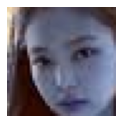

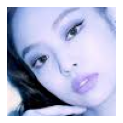

In [8]:
train_jenny = []
for i in range(len(jenny)):
    face_locations = face_recognition.face_locations(jenny[i])
    for face_location in face_locations:
        top, right, bottom, left = face_location
        #print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
        face_image = jenny[i][top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
    train_jenny.append(pil_image)
    i += 1
for j in range(len(train_jenny)):
    jenny_face = train_jenny[j]
    fig, jenny_face = plt.subplots(figsize=(2, 2), sharex=True, sharey=True)
    jenny_face.axis('off')
    jenny_face.imshow(train_jenny[j], cmap=plt.cm.gray)
    j += 1


In [9]:
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)
face_aligner = openface.AlignDlib(predictor_model)
train = []
for a in range(len(jenny)):
    detected_faces = face_detector(jenny[a], 1)
    for i, face_rect in enumerate(detected_faces):
        pose_landmarks = face_pose_predictor(jenny[a], face_rect)
        alignedFace = face_aligner.align(534, jenny[a], face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        train.append(alignedFace)
    a += 1

In [10]:
for a in range(len(jisoo)):
    detected_faces = face_detector(jisoo[a], 1)
    for i, face_rect in enumerate(detected_faces):
        pose_landmarks = face_pose_predictor(jisoo[a], face_rect)
        alignedFace = face_aligner.align(534, jisoo[a], face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        train.append(alignedFace)
    a += 1

In [11]:
for a in range(len(lisa)):
    detected_faces = face_detector(lisa[a], 1)
    for i, face_rect in enumerate(detected_faces):
        pose_landmarks = face_pose_predictor(lisa[a], face_rect)
        alignedFace = face_aligner.align(534, lisa[a], face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        train.append(alignedFace)
    a += 1

In [12]:
for a in range(len(rose)):
    detected_faces = face_detector(rose[a], 1)
    for i, face_rect in enumerate(detected_faces):
        pose_landmarks = face_pose_predictor(rose[a], face_rect)
        alignedFace = face_aligner.align(534, rose[a], face_rect, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
        train.append(alignedFace)
    a += 1

In [13]:
y = np.zeros(40)
y = y.astype(np.string_)
y[:10] = 'jenny'
y[10:20] = 'jisoo'
y[20:30] = 'lisa'
y[30:40] = 'rose'

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import pandas as pd
X = pd.read_csv("reps.csv")
y = pd.read_csv("labels.csv")
X = X[:]
y = y['1']
x_train, x_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

In [15]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [16]:
print(clf.predict(x_test))

[1 4 2 3]


In [17]:
a = np.where(y==1)
len(a)

1

In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
dic = [[1, 'Rose'].[2,'Lisa'],[3, 'Jisoo'],[4,'Jenny']]

SyntaxError: invalid syntax (<ipython-input-18-8d73ee29ab0f>, line 4)